In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the data from csv file to pandas dataframe
cardata = pd.read_csv('car data.csv')
cardata.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [4]:
cardata.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
# checking the number of rows and columns
cardata.shape

(301, 9)

(array([150.,  91.,  34.,   9.,   6.,   5.,   4.,   0.,   0.,   2.]),
 array([ 0.1 ,  3.59,  7.08, 10.57, 14.06, 17.55, 21.04, 24.53, 28.02,
        31.51, 35.  ]),
 [<matplotlib.patches.Polygon at 0x262b7f6a3d0>])

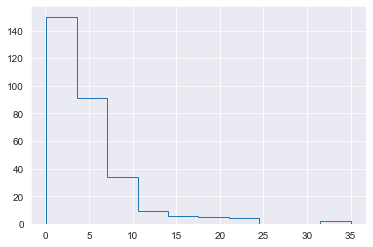

In [6]:
sns.set_style('darkgrid')
plt.hist(cardata['Selling_Price'],histtype='step')

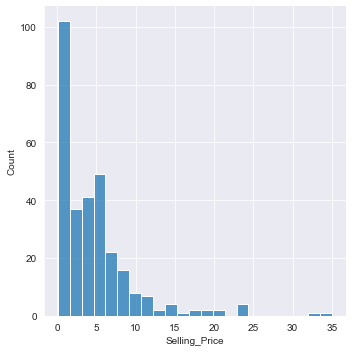

In [7]:
sns.displot(cardata.Selling_Price)

In [15]:
print(cardata.Fuel_Type.value_counts())
print(cardata.Seller_Type.value_counts())
print(cardata.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


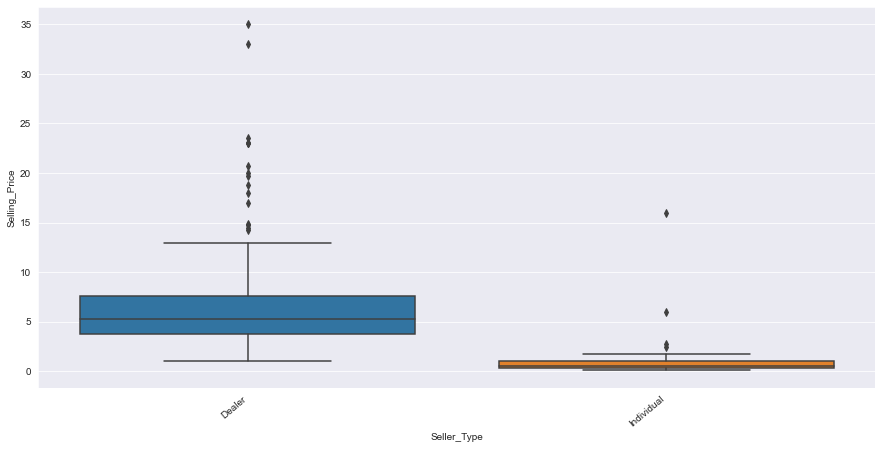

In [17]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Seller_Type',y='Selling_Price',data=cardata)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

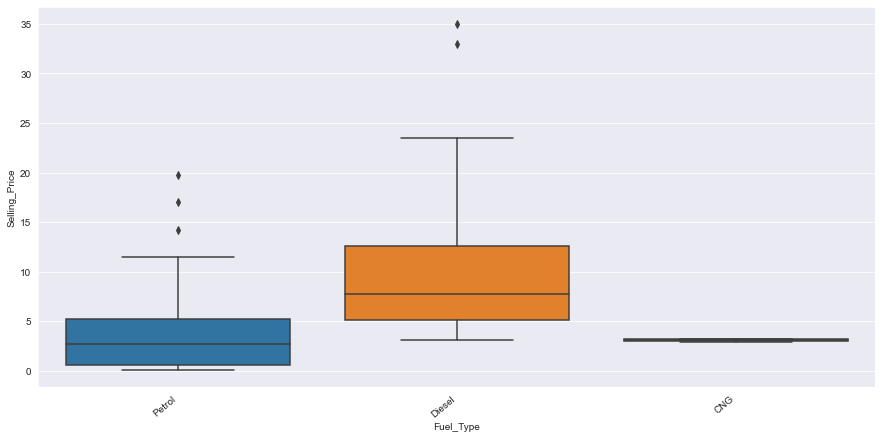

In [21]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Fuel_Type',y='Selling_Price',data=cardata)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

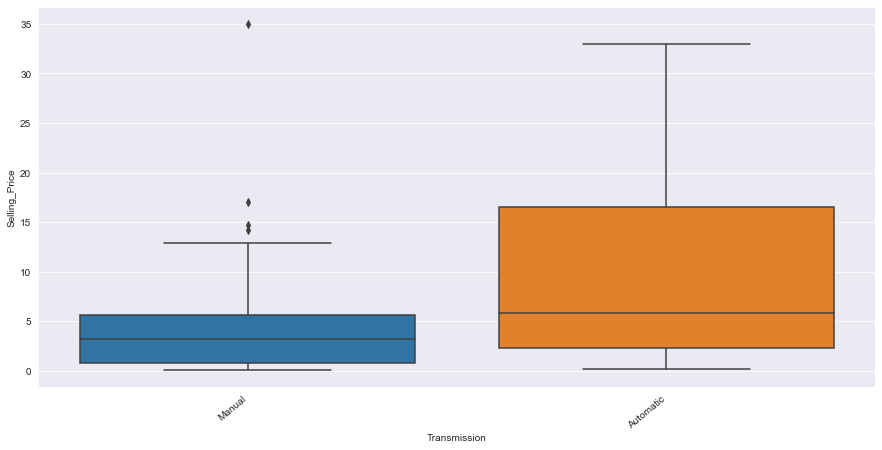

In [22]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='Transmission',y='Selling_Price',data=cardata)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [23]:
#numerical reperesentation of the values

cardata.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
cardata.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
cardata.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [24]:
cardata.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

In [26]:
plt.figure(figsize=[15,15])
sns.heatmap(cardata.corr(),annot=True)

<AxesSubplot:>

In [27]:
cardata.drop(['Seller_Type','Owner'],axis=1,inplace=True)
cardata.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Transmission  
0             0  
1             0  
2             0  
3             0  
4             0

In [28]:
X = cardata.drop(['Car_Name','Selling_Price'],axis=1)
Y = cardata['Selling_Price']

In [29]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [30]:
X

Year  Present_Price  Kms_Driven  Fuel_Type  Transmission
0    2014           5.59       27000          0             0
1    2013           9.54       43000          1             0
2    2017           9.85        6900          0             0
3    2011           4.15        5200          0             0
4    2014           6.87       42450          1             0
..    ...            ...         ...        ...           ...
296  2016          11.60       33988          1             0
297  2015           5.90       60000          0             0
298  2009          11.00       87934          0             0
299  2017          12.50        9000          1             0
300  2016           5.90        5464          0             0

[301 rows x 5 columns]

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [32]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [33]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [34]:

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [35]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [56]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.857206175468556


In [57]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [58]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9113066381462818


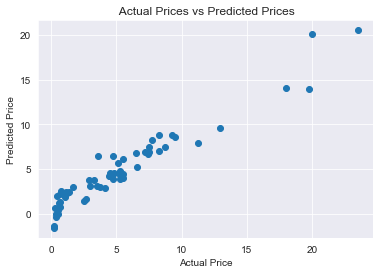

In [59]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

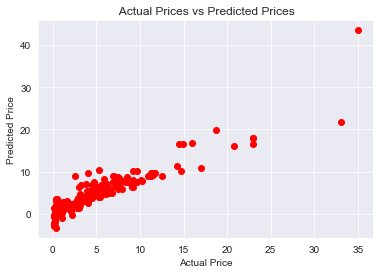

In [60]:
plt.scatter(Y_train, training_data_prediction,color="red")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()